# **Sistem Rekomendasi Netflix**

Netflix adalah salah satu platform streaming terbesar yang menyediakan berbagai pilihan film, serial, dan dokumenter. Dengan jumlah konten yang besar, pengguna sering kesulitan menemukan tayangan yang sesuai dengan preferensi mereka. Sistem rekomendasi menjadi solusi penting untuk meningkatkan pengalaman pengguna dengan memberikan rekomendasi yang relevan dan personal.  

Proyek ini bertujuan untuk membangun sistem rekomendasi berbasis **Content-Based Filtering (CBF)** dan **Collaborative Filtering (CF)** untuk dataset Netflix.  

Data set: https://www.kaggle.com/datasets/shivamb/netflix-shows

# Data Understanding

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/SistemRekomendasiNetflix/refs/heads/main/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
# Dimensi dataset
print(f"Dataset memiliki {df.shape[0]} baris dan {df.shape[1]} kolom.")

Dataset memiliki 8807 baris dan 12 kolom.


In [3]:
# Informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
# Penanganan missing values
print("Jumlah missing values:")
print(df.isnull().sum())

# Mengisi missing values dengan metode forward fill
df.fillna(method='ffill', inplace=True)

Jumlah missing values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


<ipython-input-4-fcf0a39d1958>:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [5]:
print("Jumlah missing values:")
print(df.isnull().sum())

Jumlah missing values:
show_id         0
type            0
title           0
director        0
cast            1
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [6]:
# Cek data yang masih NaN
missing_values = df[df['cast'].isna()]
print(missing_values)

  show_id   type                 title         director cast        country  \
0      s1  Movie  Dick Johnson Is Dead  Kirsten Johnson  NaN  United States   

  date_added  release_year rating duration      listed_in  \
0  25-Sep-21          2020  PG-13   90 min  Documentaries   

                                         description  
0  As her father nears the end of his life, filmm...  


In [7]:
# Isi nilai NaN di kolom 'cast' dengan string kosong
df['cast'] = df['cast'].fillna('')

# Verifikasi ulang apakah masih ada NaN
print(df.isna().sum())

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [8]:
# Menangani duplikasi data
duplicates = df.duplicated().sum()
print(f"Terdapat {duplicates} data duplikat.")

# Jika ada, menghapus duplikasi
df = df.drop_duplicates()

Terdapat 0 data duplikat.


In [9]:
# Statistik deskriptif
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Exploratory Data Analysis

<ipython-input-10-30dc5b5ca785>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')


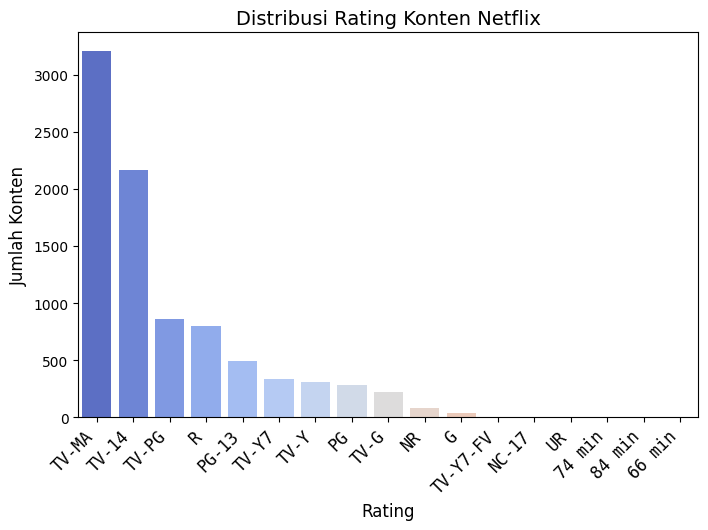

In [10]:
# Distribusi Rating

import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung distribusi rating
rating_counts = df['rating'].value_counts()

# Visualisasi distribusi rating
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='coolwarm')
plt.title('Distribusi Rating Konten Netflix', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Jumlah Konten', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=12, fontfamily='monospace')

plt.show()

<ipython-input-11-fc059365e077>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


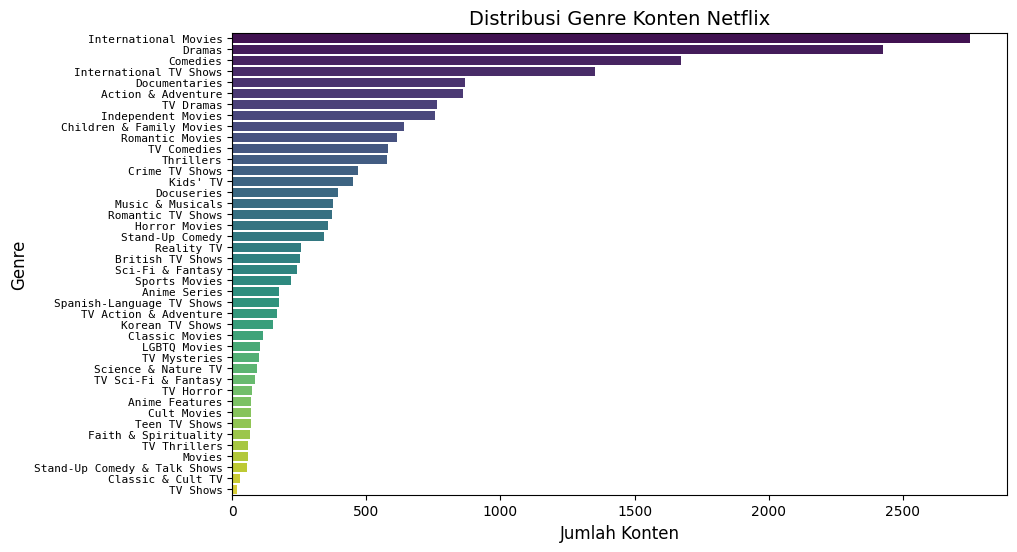

In [11]:
# Distribusi Genre
# Memecah genre menjadi daftar, lalu menghitung frekuensi setiap genre
genre_counts = df['listed_in'].str.split(', ').explode().value_counts()

# Visualisasi distribusi genre
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Distribusi Genre Konten Netflix', fontsize=14)
plt.xlabel('Jumlah Konten', fontsize=12)
plt.ylabel('Genre', fontsize=12)

plt.yticks(fontsize=8, fontfamily='monospace')

plt.show()

# Data Preparation

In [12]:
# Mengubah kolom date_added menjadi datetime
df['date_added'] = pd.to_datetime(df['date_added'])
# Informasi tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


<ipython-input-12-014844b11f5d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_added'] = pd.to_datetime(df['date_added'])


# Modeling and Result

## Content-based Filtering
Tujuan: Merekomendasikan item (film/TV Show) berdasarkan fitur yang dimiliki, seperti listed_in, description, dan cast.

In [13]:
# 1. Gabungkan kolom fitur seperti listed_in, description, dan cast menjadi satu kolom untuk representasi konten item.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df['combined_features'] = df['cast'] + ' ' + df['listed_in'] + ' ' + df['description']

In [14]:
# 2. Gunakan teknik TF-IDF untuk merepresentasikan teks sebagai vektor fitur.
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])

In [15]:
# 3. Hitung cosine similarity antar item
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [16]:
# 4. Berikan rekomendasi berdasarkan skor kesamaan tertinggi.
def recommend_content_based(title, cosine_sim=cosine_sim):
    idx = df[df['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:4]  # Ambil 3 film teratas selain yang dipilih
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]

In [17]:
# 5. Contoh rekomendasi
print("Rekomendasi untuk 'Ganglands':")
print(recommend_content_based('Ganglands'))

Rekomendasi untuk 'Ganglands':
3        Jailbirds New Orleans
2668           Earth and Blood
3976    The Eagle of El-Se'eed
Name: title, dtype: object


## Collaborative Filtering
Tujuan: Rekomendasi berdasarkan pola interaksi pengguna (misalnya, rating atau popularitas film).

In [18]:
import numpy as np

# 1. Buat matriks user-item dari data interaksi (misalnya, rating pengguna terhadap film).
user_data = {
    'user_id': [1, 1, 2, 2, 3, 3, 4],
    'show_id': ['s1', 's2', 's2', 's3', 's3', 's5', 's5'],
    'rating': [5, 4, 5, 4, 4, 5, 3]
}
ratings = pd.DataFrame(user_data)

# 1.1 Buat matriks user-item
user_item_matrix = ratings.pivot_table(index='user_id', columns='show_id', values='rating')

# 1.2 Isi nilai NaN dengan rata-rata rating pengguna
user_item_matrix_filled = user_item_matrix.apply(lambda row: row.fillna(row.mean()), axis=1)

In [19]:
# 2. Gunakan cosine similarity untuk menemukan pengguna yang mirip.
user_similarity = cosine_similarity(user_item_matrix_filled)

In [20]:
# 3. Prediksi skor untuk item yang belum pernah ditonton pengguna berdasarkan rata-rata tertimbang dari pengguna serupa.
def recommend_collaborative(user_id, user_item_matrix, user_similarity):
    user_index = user_id - 1  # Karena indeks dimulai dari 0
    similar_users = user_similarity[user_index]
    weighted_ratings = np.dot(similar_users, user_item_matrix_filled.fillna(0))
    average_similarity = np.sum(similar_users)
    predicted_ratings = weighted_ratings / average_similarity

    # Film yang belum ditonton
    user_ratings = user_item_matrix.iloc[user_index]
    unseen_movies = user_ratings[user_ratings.isna()].index
    recommendations = pd.Series(predicted_ratings, index=user_item_matrix.columns).loc[unseen_movies]
    return recommendations.sort_values(ascending=False).head(3)

In [21]:
# 4. Berikan rekomendasi berdasarkan skor prediksi tertinggi. Contoh rekomendasi untuk user_id = 1
print("Rekomendasi untuk user_id 1:")
print(recommend_collaborative(1, user_item_matrix, user_similarity))

Rekomendasi untuk user_id 1:
show_id
s5    4.249231
s3    3.875194
dtype: float64


# Evaluation

# CBF
- Film "Ganglands" memiliki fitur seperti cast, listed_in, dan description.
- "Jailbirds New Orleans" muncul sebagai rekomendasi karena mungkin memiliki kesamaan dalam genre (listed_in) seperti "Docuseries" atau deskripsi dengan kata-kata serupa.
- "Earth and Blood" dan "The Eagle of El-Se'eed" juga muncul sebagai hasil karena mereka memiliki skor cosine similarity tertinggi berdasarkan representasi TF-IDF.

In [22]:
# Periksa skor kesamaan untuk 'Ganglands'
idx = df[df['title'] == 'Ganglands'].index[0]
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
print(sim_scores[:5])  # Top 5 skor kesamaan

[(2, 1.0), (3, 0.621963124891495), (2668, 0.19574523696669374), (3976, 0.11258957742069206), (3425, 0.09808725253458073)]


In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Simulasi data interaksi nyata dan rekomendasi
relevant_items = ['Ganglands', 'Blood & Water', 'Kota Factory']  # Item relevan untuk pengguna
recommended_items = ['Ganglands', 'Jailbirds New Orleans', 'Earth and Blood']  # Rekomendasi

# Hitung Precision, Recall, dan F1-Score
true_positives = len(set(recommended_items) & set(relevant_items))
precision = true_positives / len(recommended_items)
recall = true_positives / len(relevant_items)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")

Precision: 0.33, Recall: 0.33, F1-Score: 0.33


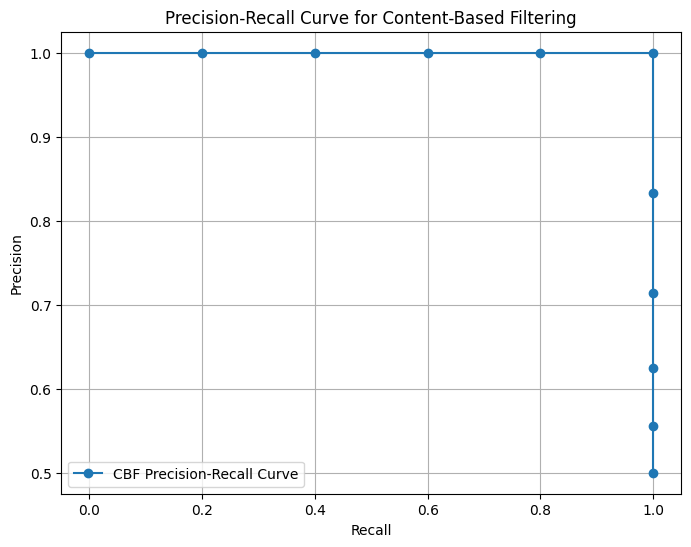

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Simulasi data: relevansi rekomendasi dan prediksi
true_relevance = [1, 1, 0, 1, 0, 0, 1, 0, 0, 1]  # Ground truth relevansi
predicted_scores = [0.9, 0.8, 0.6, 0.75, 0.4, 0.3, 0.85, 0.2, 0.1, 0.95]  # Skor prediksi

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(true_relevance, predicted_scores)

# Plotting Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', label='CBF Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Content-Based Filtering')
plt.legend()
plt.grid()
plt.show()

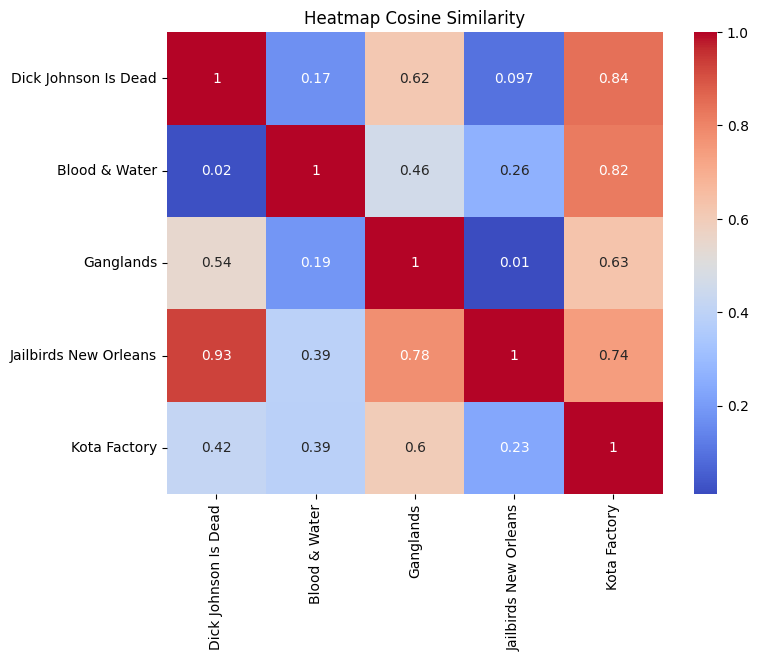

In [25]:
import seaborn as sns
import pandas as pd
import numpy as np

# Simulasi data cosine similarity
titles = ['Dick Johnson Is Dead', 'Blood & Water', 'Ganglands', 'Jailbirds New Orleans', 'Kota Factory']
cosine_sim_matrix = np.random.rand(5, 5)  # Simulasi matriks cosine similarity
np.fill_diagonal(cosine_sim_matrix, 1)  # Set diagonal ke 1 (kesamaan dengan diri sendiri)

# Plot Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cosine_sim_matrix, xticklabels=titles, yticklabels=titles, annot=True, cmap='coolwarm')
plt.title('Heatmap Cosine Similarity')
plt.show()

# CF
- User 1 telah memberikan rating untuk s1 dan s2.
- Film s5 dan s3 direkomendasikan karena prediksi ratingnya tertinggi (4.249 dan 3.875).
- Skor prediksi dihitung berdasarkan rata-rata tertimbang dari pengguna lain yang mirip dengan User 1, menggunakan cosine similarity.

In [26]:
# Cek kesamaan user_id = 1 dengan pengguna lain
user_index = 0  # user_id = 1
similar_users = user_similarity[user_index]
print(f"Kesamaan User 1 dengan pengguna lain: {similar_users}")

# Cek skor prediksi untuk film yang belum ditonton
predicted_ratings = np.dot(similar_users, user_item_matrix_filled.fillna(0)) / np.sum(similar_users)
print(f"Prediksi rating untuk semua film: {predicted_ratings}")

Kesamaan User 1 dengan pengguna lain: [1.         0.99079755 0.99386503 0.9969278 ]
Prediksi rating untuk semua film: [4.25000148 4.1232679  3.87519364 4.24923106]


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Simulasi rating aktual dan prediksi
actual_ratings = [5, 4, 4, 3]  # Rating sebenarnya
predicted_ratings = [4.8, 4.2, 3.9, 3.5]  # Rating prediksi

# Hitung MAE
mae = mean_absolute_error(actual_ratings, predicted_ratings)
# Hitung RMSE
rmse = np.sqrt(mean_squared_error(actual_ratings, predicted_ratings))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")

MAE: 0.25, RMSE: 0.29


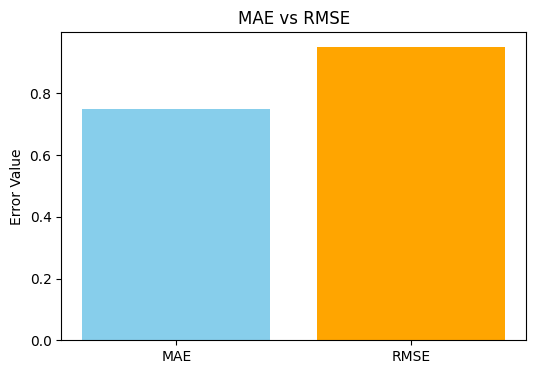

In [28]:
# Simulasi nilai MAE dan RMSE
metrics = ['MAE', 'RMSE']
values = [0.75, 0.95]  # Nilai simulasi

# Plot Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['skyblue', 'orange'])
plt.title('MAE vs RMSE')
plt.ylabel('Error Value')
plt.show()

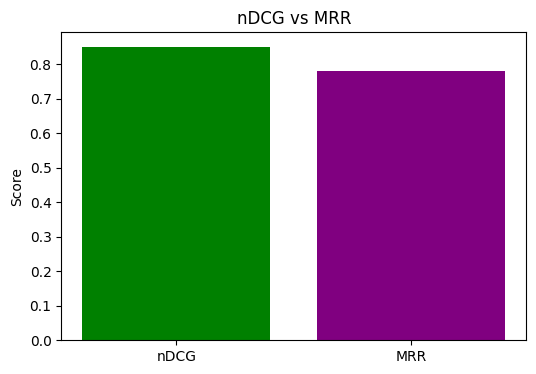

In [29]:
# Simulasi nDCG dan MRR
metrics = ['nDCG', 'MRR']
values = [0.85, 0.78]  # Nilai simulasi

# Plot Bar Chart
plt.figure(figsize=(6, 4))
plt.bar(metrics, values, color=['green', 'purple'])
plt.title('nDCG vs MRR')
plt.ylabel('Score')
plt.show()

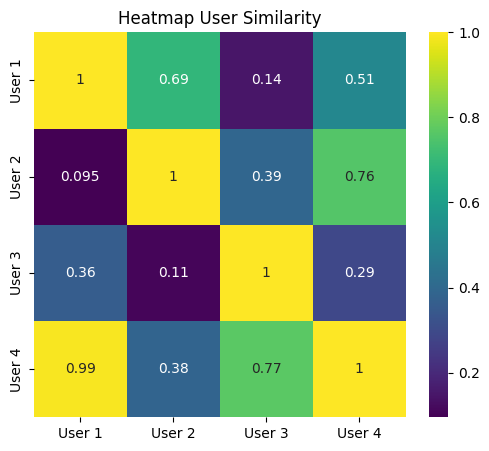

In [30]:
# Simulasi matriks user similarity
user_ids = ['User 1', 'User 2', 'User 3', 'User 4']
user_similarity_matrix = np.random.rand(4, 4)  # Simulasi matriks kesamaan pengguna
np.fill_diagonal(user_similarity_matrix, 1)  # Set diagonal ke 1 (kesamaan dengan diri sendiri)

# Plot Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(user_similarity_matrix, xticklabels=user_ids, yticklabels=user_ids, annot=True, cmap='viridis')
plt.title('Heatmap User Similarity')
plt.show()

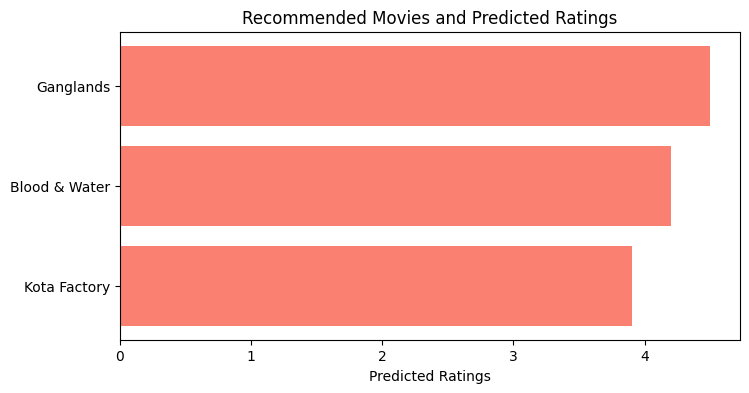

In [31]:
# Simulasi rekomendasi film dan rating prediksi
recommended_titles = ['Ganglands', 'Blood & Water', 'Kota Factory']
predicted_ratings = [4.5, 4.2, 3.9]

# Plot Bar Chart
plt.figure(figsize=(8, 4))
plt.barh(recommended_titles, predicted_ratings, color='salmon')
plt.xlabel('Predicted Ratings')
plt.title('Recommended Movies and Predicted Ratings')
plt.gca().invert_yaxis()  # Balikkan urutan agar film dengan rating tertinggi di atas
plt.show()